In [13]:
import matplotlib.pyplot as plt
import math as _m
import random2 as _r

In [14]:
w = [2, 0.8, 7, 0.3, 2]
v = [0, 1, 0, 1]

In [15]:
def f(x, lda):
    n = len(x)
    s = _m.prod(lda[i]**x[i] for i in range(n))
    den = _m.prod(1+l for l in lda)
    return s / den

def g(x, s, lda):
    n = len(x)
    num = sum(lda[i] * ((1-s)**x[i]) * (s**(1-x[i])) for i in range(n))
    den = 2**(n-1) * sum(lda)
    return num / den

In [16]:
f(v,w)
g(v, 0.1, w)

0.019524793388429752

In [323]:
def all_f(lda):
    n = len(lda)
    l = []
    for i in range(2**n):
        binary = bin(i)[2:]
        binary = '0' * (n - len(binary)) + binary
        b = [int(j) for j in binary]
        val = f(b,lda)
        l.append(val)
    plt.figure()
    plt.subplots(1,1)
    plt.plot(range(2**n), l)
    plt.show()
    return sum(l)

def all_g(s, lda):
    n = len(lda)
    l = []
    exp = [0]*n
    var = []
    for i in range(2**n):
        binary = bin(i)[2:]
        binary = '0' * (n - len(binary)) + binary
        b = [int(j) for j in binary]
        val = g(b,s,lda)
        exp = [exp[j] + val*b[j] for j in range(n)]
        l.append(val)
    for i in range(2**n):
        binary = bin(i)[2:]
        binary = '0' * (n - len(binary)) + binary
        b = [int(j) for j in binary]
        val = g(b,s,lda)
        var.append(val*sum((b[j] - exp[j])**2 for j in range(n)))
    plt.figure()
    plt.subplots(1,1)
    plt.plot(range(2**n), l)
    plt.show()
    return exp, sum(var)

<Figure size 432x288 with 0 Axes>

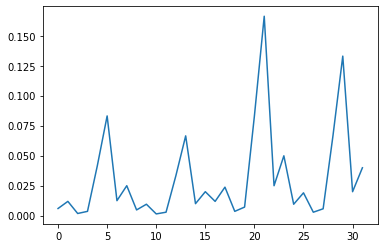

0.9999999999999999

In [18]:
all_f(w)

In [316]:
def rho(s, gamma):
    n = len(gamma)
    num = 1 - 2*s
    den = sum(gamma)
    coeff = num/den
    return [coeff*g for g in gamma]

[2, 0.8, 7, 0.3, 2]
[0.45041322314049587, 0.48016528925619834, 0.3264462809917355, 0.4925619834710742, 0.4504132231404958]


<Figure size 432x288 with 0 Axes>

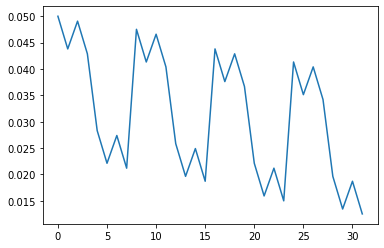

[0.012396694214876033, 0.0049586776859504135, 0.04338842975206612, 0.001859504132231405, 0.012396694214876033]
[0.45041322314049587, 0.48016528925619834, 0.3264462809917355, 0.4925619834710744, 0.45041322314049587]


<Figure size 432x288 with 0 Axes>

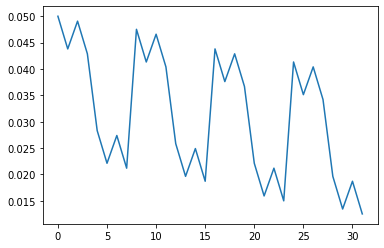

[0.45041322314049587,
 0.48016528925619834,
 0.3264462809917355,
 0.4925619834710744,
 0.45041322314049587]

In [302]:
s = 0.8
print(w)
all_g(s, w)
w1 = rho(s, w)
w1 = [-i for i in w1]
print(w1)
all_g(s, w1)

In [21]:
def rho2(gamma):
    return [1/(1+g) for g in gamma]
def e(gamma):
    return [g/(1+g) for g in gamma]

In [450]:
q = w
q = e(q)
print(q)
print(rho(0.1, q))
for _ in range(10000):
    q = e(q)
print(q)

[0.6666666666666666, 0.4444444444444445, 0.875, 0.23076923076923075, 0.6666666666666666]
[0.18495739162652836, 0.12330492775101891, 0.24275657650981847, 0.06402371248610597, 0.18495739162652836]
[9.998500224966124e-05, 9.997750506136093e-05, 9.998857273454437e-05, 9.995668543631089e-05, 9.998500224966124e-05]


In [346]:
def norm_vector(v):
    M = max([abs(i) for i in v])
    return [i/M for i in v]

def random_vector(n, samples):
    while True:
        first = [_r.randint(0,1) for i in range(n)]
        if first.count(1) != 0: break
    for _ in range(samples):
        first = [_r.randint(0,1) + first[i] for i in range(n)]
    return first

def addData(n, s, samples):
    g1 = random_vector(n, samples)
    print(g1)
    gr1 = rho(s, g1)
    exp, var = all_g(s, gr1)
    return exp, var

def datafromfunc(n, s, func):
    gamma = [func(i+1) for i in range(n)]
    gamma = rho(s, gamma)
    print(gamma)
    return all_g(s, gamma)


[48, 36, 50, 45, 46, 47]


<Figure size 432x288 with 0 Axes>

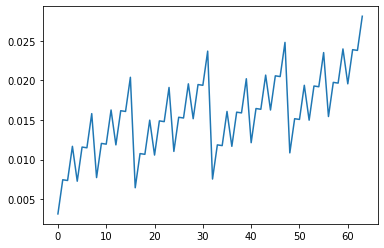

([0.5705882352941176,
  0.5529411764705882,
  0.573529411764706,
  0.5661764705882352,
  0.5676470588235293,
  0.5691176470588235],
 1.473075259515571)

In [331]:
addData(6, 0.1, 100)

In [369]:
def succ(x, rate):
    return _m.exp((-(1-rate)/(rate))*(x-1))

[0.2120552487000988, 0.13814107135770595, 0.08999048933159425, 0.05862331955693226, 0.03818952004150985, 0.024878144943404536, 0.01620659529505244, 0.010557609164796205, 0.006877638964096074, 0.00448036264480961]


<Figure size 432x288 with 0 Axes>

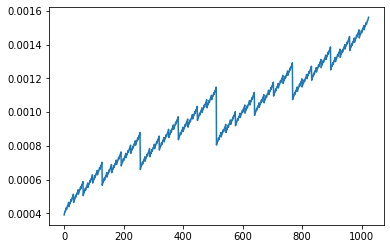

([0.6060276243500492,
  0.5690705356788527,
  0.5449952446657971,
  0.529311659778466,
  0.5190947600207549,
  0.5124390724717022,
  0.5081032976475263,
  0.505278804582398,
  0.5034388194820478,
  0.5022401813224048],
 2.480473945047638)

In [370]:
r = 0.7
datafromfunc(10, .2, lambda x: succ(x, r))

In [424]:
def lhr(n, samples, s, lda):
    D = []
    for _ in range(samples):
        D.append(random_vector(n, 0))
    p = 1
    for v in D:
        p *= g(v, s, lda)
    return p

def lh(D, s, lda):
    p = 1
    for v in D:
        p *= g(v, s, lda)
    return p

def mle():
    x = []
    z = []
    vals = []
    D = []
    for _ in range(20):
        D.append(random_vector(3, 0))
    print(D)
    print([sum(l[0] for l in D), sum(l[1] for l in D), sum(l[2] for l in D)])
    for i in range(1, 100):
        for j in range(1, 100):
            for k in range(1, 100):
                x.append([i/100,j/100,k/100])
                z.append(lh(D, .2, [i/100,j/100,k/100]))
                vals.append((i/100,j/100,k/100,lh(D, .2, [i/100,j/100,k/100])))
    return sorted(vals, key=lambda t: t[3], reverse=True)[0]

In [425]:
mle()

[[1, 1, 1], [0, 1, 1], [1, 0, 0], [0, 1, 1], [0, 1, 1], [0, 0, 1], [0, 1, 1], [0, 0, 1], [1, 1, 0], [1, 1, 0], [0, 1, 1], [0, 1, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 1, 0], [1, 1, 0], [1, 0, 0]]
[7, 15, 10]


(0.01, 0.99, 0.14, 1.1911632479781769e-17)

In [426]:
def mds(n, s, k, a):
    c1 = (1 - 2*s) / n
    c2 = k / (2*a)
    c3 = n + 1 - 2*s
    return c1*(c2*c3 - 1)

<Figure size 432x288 with 0 Axes>

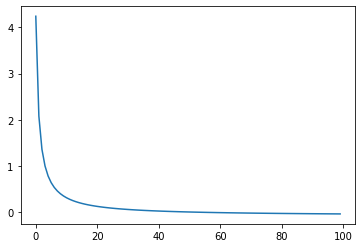

In [428]:
n = 10
s = 0.1
k = 10
l = []
for i in range(n*k):
    l.append(mds(n,s,k,i+1))
plt.figure()
plt.subplots(1,1)
plt.plot(range(n*k), l)
plt.show()

<Figure size 432x288 with 0 Axes>

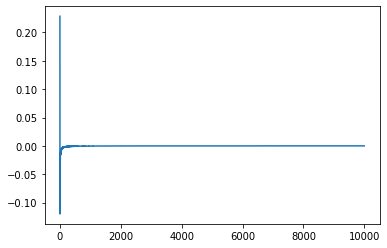

In [440]:
s = 0.1
k = 10
l = []
for n in range(1, 10001):
    l.append(mds(n,s,k,_r.randint(n*(k-3), n*k)))
plt.figure()
plt.subplots(1,1)
plt.plot(range(10000), l)
plt.show()